In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

$$
\def\var{{\text{Var}}} % Variance
\def\corr{{\text{Corr}}} % Correlation
\def\cov{{\text{Cov}}} % Covariance
\def\expval{{}}
\newcommand\norm[1]{\lVert#1\rVert} % norm
\def\setR{{\rm I\!R}} % Sets
\def\rx{{\textrm{X}}} % Scalar random variables
\def\ry{{\textrm{Y}}}
\def\rz{{\textrm{Z}}}
\def\rvx{{\textbf{X}}} % Vector random variables
\def\rvy{{\textbf{Y}}}
\def\rvz{{\textbf{Z}}}
\def\vtheta{{\boldsymbol{\theta}}} % Vectors
\def\va{{\boldsymbol{a}}}
\def\vb{{\boldsymbol{b}}}
\def\vi{{\boldsymbol{i}}}
\def\vj{{\boldsymbol{j}}}
\def\vp{{\boldsymbol{p}}}
\def\vq{{\boldsymbol{q}}}
\def\vu{{\boldsymbol{u}}}
\def\vv{{\boldsymbol{v}}}
\def\vw{{\boldsymbol{w}}}
\def\vx{{\boldsymbol{x}}}
\def\vy{{\boldsymbol{y}}}
\def\vz{{\boldsymbol{z}}}
\def\evu{{u}} % Elements of vectors
\def\evv{{v}}
\def\evw{{w}}
\def\evx{{x}}
\def\evy{{y}}
\def\evz{{z}}
\def\mA{{\boldsymbol{A}}} % Matrices
\def\mB{{\boldsymbol{B}}}
\def\mC{{\boldsymbol{C}}}
\def\mD{{\boldsymbol{D}}}
\def\mI{{\boldsymbol{I}}}
\def\mQ{{\boldsymbol{Q}}}
\def\mS{{\boldsymbol{S}}}
\def\mT{{\boldsymbol{T}}}
\def\mU{{\boldsymbol{U}}}
\def\mV{{\boldsymbol{V}}}
\def\mW{{\boldsymbol{W}}}
\def\mX{{\boldsymbol{X}}}
\def\mLambda{{\boldsymbol{\Lambda}}}
\def\mSigma{{\boldsymbol{\Sigma}}}
\def\emA{{A}} % Elements of matrices
\def\emB{{B}}
\def\emX{{X}}
\def\tT{{T}} % Transformations
$$



Appendix A. Graphical Representation of Equations
=================================================

In this section, you’ll see a practical introduction to graphical
representations of equations with Python.

Plotting Equations
------------------

### Two Variables

You’ll use the function `plot()` from Matplotlib to plot the
relationship between two variables. The `plot()` function draws lines
between points, which are defined by coordinates, so you’ll need at
least two points to draw a linear equation.

Let’s take an example. If you want to convert meters to feet, you’ll
need to know the relationship between these two units. In this case, 1
meter is approximately equal to 3.28 feet. If you call $m$ the number of
meters and $f$ the number of feet, you can write:

$$
f = 3.28 m
$$

For instance, the equation means that two meters corresponds to
$3.28 \cdot 2 = 6.56$ feet. It expresses the relationship between meters
and feet. You can also consider it as a *mapping* between the number of
meters and the number of feet, that is to say, as a list of pairs of
values.

| meters   | feet     |
|----------|----------|
| 1        | 3.28     |
| 2        | 6.56     |
| 3        | 9.84     |
| $\vdots$ | $\vdots$ |
| 10       | 32.8     |
| $\vdots$ | $\vdots$ |

You can take two points from this mapping and display $m$ on the x-axis
and $f$ on the y-axis. For instance:

-   The point at $m=0$, that corresponds to $f=3.28 \times 0 = 0$,
    giving coordinates zero on the $x$-axis and zero on the $y$-axis.
-   The point at $m=3$, that corresponds to $f=3.28 \times 3 = 9.84$,
    giving coordinates (3, 9.84).

Create a variable `x` that contains the $x$ coordinates and a variable
`y` that contains the $y$ coordinates:

In [2]:
x = [0, 3]
y = [0, 9.84]

If you use `plt.plot()` to visualize this two points, Matplotlib will
draw a line going from the coordinate (0, 0) to the coordinate (3,
9.84).

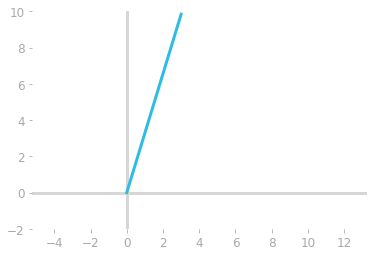

In [3]:
plt.plot(x, y)
# [...] Add axes, styles etc.

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')

plt.xlim(-2, 10)
plt.ylim(-2, 10)
plt.show()


<img src="images/blank.png" id="fig:appA_equation_line_points" alt="Figure 197: Equation of the line corresponding to the relationship between feet and meters using two points." />
Figure 197: Equation of the line corresponding to the relationship between feet and meters using two points.

However, this procedure of connecting two points with a line will not
work for nonlinear equations (those not represented by a line): you’ll
need more points for that.

To avoid manually filling in values from the equation mapping, you can
create an array representing the $x$ values with the resolution you
need, for instance, all values in a range with a step of 0.1. Then, you
calculate $y$ for all values of $x$.

You can use `np.arange(start, stop, step)` that creates an array with
values from `start` to `stop`. Each value is spaced by the value of
`step`.

In [4]:
x = np.arange(-10, 11, 1)
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

The `x` array contains values from -10 to 10 (we stopped at 11 because
the `stop` value is excluded) with a step of one.

Then, you can create a $y$ that depends on $x$. We will take the example
of the nonlinear sinusoid function $\sin(x)$:

In [5]:
y = np.sin(x)
y

array([ 0.54402111, -0.41211849, -0.98935825, -0.6569866 ,  0.2794155 ,
        0.95892427,  0.7568025 , -0.14112001, -0.90929743, -0.84147098,
        0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111])

Now you have two arrays that you can plot.

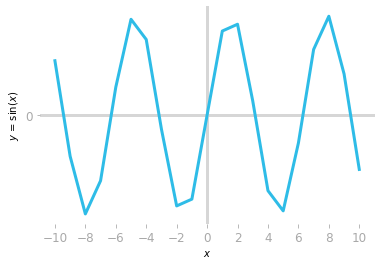

In [6]:
plt.plot(x, y)
# [...] Add axes, styles etc.


# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

plt.xlabel("$x$")
plt.ylabel("$y$ = $\sin(x)$")
plt.show()



<img src="images/blank.png" id="fig:appA_broken_sine_wave" alt="Figure 198: Sinusoid function represented with a low resolution." />
Figure 198: Sinusoid function represented with a low resolution.

Figure [198](#fig:appA_broken_sine_wave) looks like a broken sine
function! This is because you did not take enough points and thus the
resolution is bad. Let’s do it again with a different step.

In [7]:
x = np.arange(-10, 11, 0.1)
y = np.sin(x)

This time let’s take a step of 0.1, leading to more values in both
arrays (see Figure [199](#fig:appA_sine_good_resolution)).

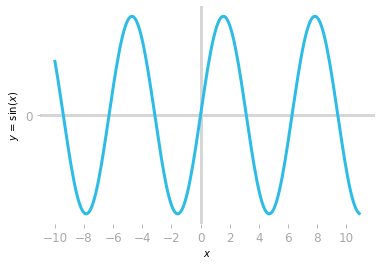

In [8]:
plt.plot(x, y)
# [...] Add axes, styles etc.

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)


plt.xlabel("$x$")
plt.ylabel("$y$ = $\sin(x)$")
plt.show()


<img src="images/blank.png" id="fig:appA_sine_good_resolution" alt="Figure 199: Sinusoid function with a better resolution" />
Figure 199: Sinusoid function with a better resolution

Figure [199](#fig:appA_sine_good_resolution) shows the sinusoid function
with a better resolution.

### More Than Two Variables

The plots you did in the last section used two axes, meaning that only
two variables can be used. How can you do to visualize the relationship
between more than two variables?

Let’s take an example of an equation with three variables.

$$
z = 2x + 3y + 8
$$

Each point of the mapping is this time defined by three values instead
of two, and thus you’ll need three dimensions to plot this equation.
This also means that you’ll not plot a curve but a plane.

Let’s use a 3D plot to represent it, with the function `plot_surface()`
from Matplotlib.

To do so, you’ll need to draw a grid of values. First, the Numpy
function `np.linspace(start, stop, num)` creates array of `num` values
from `start` to `stop`:

In [9]:

np.set_printoptions(threshold=30, edgeitems=5)

np.linspace(-10, 10, 100)

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919, ...,   9.19191919,   9.39393939,   9.5959596 ,
         9.7979798 ,  10.        ])

You can use the function `np.meshgrid()` from Numpy to create all
possible combinations of these 1D arrays. You give it two
one-dimensional arrays and it returns two two-dimensional arrays:

In [10]:
x, y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
x.shape

(100, 100)

All pairs of values from `x` and `y` gives all combinations of values
from -10 to 10. Each combination corresponds to one point of coordinates
`x` and `y`, and you can calculate $z$ from these two values according
to the equation above.

In [11]:
z = 2 * x + 3 * y + 8
z.shape

(100, 100)

Let’s try to plot the function:

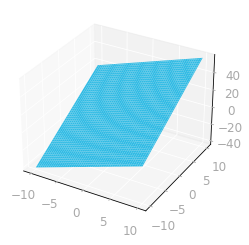

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z)

plt.show()


<img src="images/blank.png" id="fig:appA_three_dimensional_plot" alt="Figure 200: Three-dimensional plot of a plane." />
Figure 200: Three-dimensional plot of a plane.

Figure [200](#fig:appA_three_dimensional_plot) shows a plane
corresponding to your equation.

Note that we represented it with arbitrary limitations (between -10 and
10 for $x$ and $y$) but it is infinite, just as with lines.

Slope And Intercept
-------------------

Lines in the Cartesian plane, and thus linear equations, are defined by
two parameters. These two parameters correspond graphically to the
*slope* and the *$y$-intercept* (the $y$ value when $x=0$) of the line
defined by the equation.

Let’s take the example of the following equation, $a$ is the slope and
$b$ the $y$-intercept:

$$
y = ax + b
$$

### Slope

The slope $a$ is the parameter multiplied by $x$: it tells you that when
you increase $x$ of one unit, $y$ increases of $ax$ units. It tells how
much $y$ changes in comparison to $x$. This is the ratio of the change
on the $y$-axis over the change on the $x$-axis.

<img src="images/appA_linear_equation_slope.png" id="fig:appA_linear_equation_slope" width="250" alt="Figure 201: Linear equations with different slopes." />
Figure 201: Linear equations with different slopes.

Figure [201](#fig:appA_linear_equation_slope) shows examples of linear
equations with the $y$-intercept equal to zero ($b=0$) and different
values of the slope. Note that when the slope equals zero, the function
is constant (same $y$ for all $x$).

When you go from 0 to 1 on the $x$-axis, $y$ changes accordingly to the
slope. For instance, the blue line has a slope equal to 2, meaning that
you add 2 on the vertical axis each time you add 1 on the horizontal
axis. A negative slope means that you add negative values to $y$ each
time you add positive values to $x$.

### $y$-Intercept

The $y$-intercept corresponds to the value on the vertical axis when
$x=0$. This value doesn’t affect the slope of the line.

<img src="images/appA_linear_equation_intercept.png" id="fig:appA_linear_equation_intercept" width="250" alt="Figure 202: Linear equations with different values of y-intercept and a fixed slope of 1." />
Figure 202: Linear equations with different values of <span class="math inline"><em>y</em></span>-intercept and a fixed slope of 1.

Figure [202](#fig:appA_linear_equation_intercept) shows lines
corresponding to linear equations with different $y$-intercepts. You can
see that the lines are parallel (because the slope is the same) and
vertically shifted.

